Store Sales and Profit Analysis using Python

Background Information

Store sales and profit analysis is the task of analysing the performance of a retail store in terms of its sales and profits. 
It helps businesses identify areas for improvement and make data-driven decisions to optimize their operations, pricing, marketing, and inventory management strategies to drive revenue and growth. 
So in this project we will learn how to analyse the sales and profit of a store, using Python.

•Instructions

Import all the necessary libraries for your project

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


•Have a glimpse look at your data 

In [14]:
#if it happens that you get an error regarding encoding please change encoding to latin-1

sales_data = pd.read_csv('C:/Users/Sicelo/Documents/Python Data Analysis/Ongoing Projects/Store Sales and Profit Analysis/Sample - Superstore.csv', encoding = 'latin-1')

print("The first 10 rows of the sales data: ")
sales_data.head(10)


The first 10 rows of the sales data: 


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [15]:
#lets view the columns of our dataset and the data types

print(sales_data.columns)
print(sales_data.dtypes)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


Look at the summary statistics about the sales data

In [16]:
print("The Summary Statistics concerning the sales data: ")
print()
sales_data.describe()

The Summary Statistics concerning the sales data: 



,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


•	Since we would like to analyse sales based on some time periods, it would be nice to wrangle the date column

I.	Convert the Order date and Ship date columns to datetime objects

II.	Add month, year and day of the week as the new columns of the dataframe


In [17]:
#We have decided to retain the column names while changing the columns to datetime objects

sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data['Ship Date']  =  pd.to_datetime(sales_data['Ship Date'])

sales_data['Order Year'] = sales_data['Order Date'].dt.year
sales_data['Order Month'] = sales_data['Order Date'].dt.month
sales_data['Order day of Week'] = sales_data['Order Date'].dt.dayofweek


Visualise monthly sales using a line plot and make some deductions

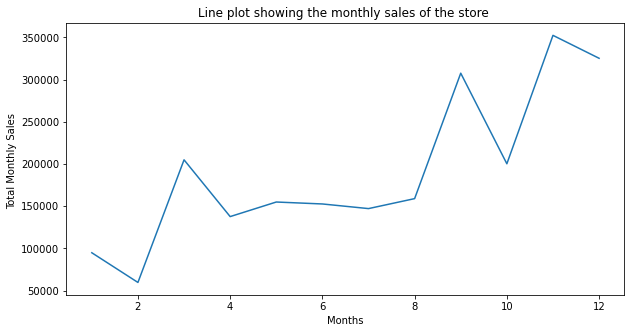

Order Month    11
Sales          10
dtype: int64


In [18]:
monthly_sales = sales_data.groupby('Order Month')['Sales'].sum().reset_index()

#reset_index() ensures in this case ensures that Order month is retained as a column

#now prepare for plotting:

plt.figure(figsize = (10,5))

plt.plot(monthly_sales['Order Month'],  monthly_sales['Sales'])

plt.title("Line plot showing the monthly sales of the store ")
plt.xlabel('Months')
plt.ylabel("Total Monthly Sales ")


plt.show()



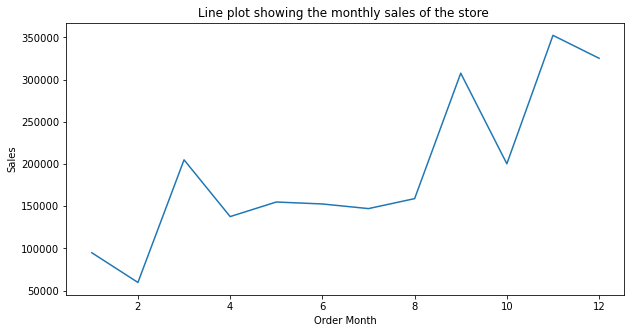

In [64]:
#Alternatively if we choose to use the seaborn library:

monthly_sales = sales_data.groupby('Order Month')['Sales'].sum().reset_index()

#reset_index() ensures in this case ensures that Order month is retained as a column

#now prepare for plotting:

plt.figure(figsize = (10,5))

sns.lineplot(data = monthly_sales, x = 'Order Month', y = 'Sales', )

plt.title("Line plot showing the monthly sales of the store ")

plt.show()

Now analyse sales by category and use a pie plot

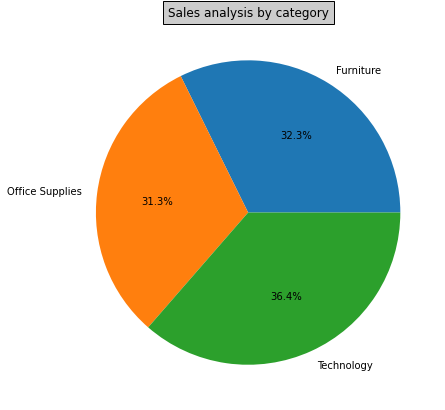

In [29]:
category_sales = sales_data.groupby('Category')['Sales'].sum().reset_index()

#Now preparing to plot
plt.figure(figsize = (10, 7))

labels = list(category_sales['Category'])

plt.pie( data = category_sales, x = category_sales['Sales'], labels = labels,  autopct='%1.1f%%' )

plt.title("Sales analysis by category", bbox={'facecolor':'0.8', 'pad':5})

plt.show()


From the pie chart we can clearly observe that the store generates most of it's sales from Technology equipment followed by furniture and lastly Office Supplies 

==============================================================================================================

Draw a bar plot to visualize sales by sub-category and determine which products contribute significantly to sales in the organisation

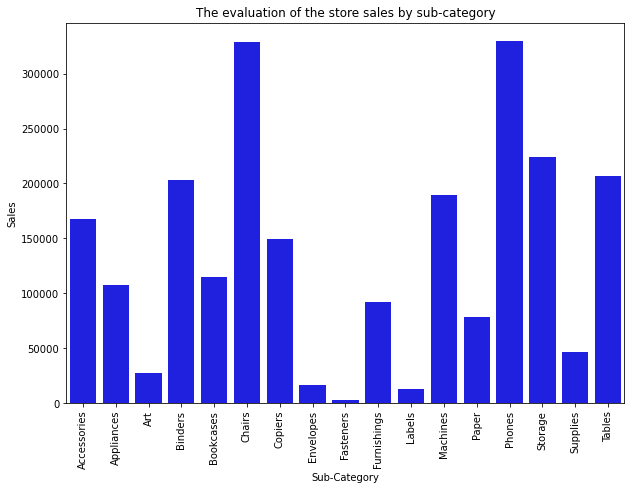

In [36]:
sub_category_sales = sales_data.groupby('Sub-Category')['Sales'].sum().reset_index()

#Now preparing for plotting

plt.figure(figsize= (10, 7))

sns.barplot(data = sub_category_sales, x = 'Sub-Category', y = 'Sales', color = 'blue')

labels = sub_category_sales['Sub-Category']

plt.title("The evaluation of the store sales by sub-category")

plt.xticks(ticks = np.arange(len(sub_category_sales['Sub-Category'])), labels = labels, rotation = 90)

plt.show()

From the chart we can observe the following 

- Chairs and Phones generate the highest sales for the store

- While Envelops, Fasteners, labels and Art do not contribute significantly to store sales

- This also makes sense since we have also observed that furniture and Technology contribute significantly to the store sales

============================================================================================================



We have looked into Sales, now let’s look into Profit.

I. Analyse monthly profits using a line plot

II. Attach markers to your line plot

III. Which months did the company achieved good profit

IV. If you were a potential investor, in which period would it be a good period to invest in the company i.e. 0-6 months or 7-12 months? Please justify your answer.

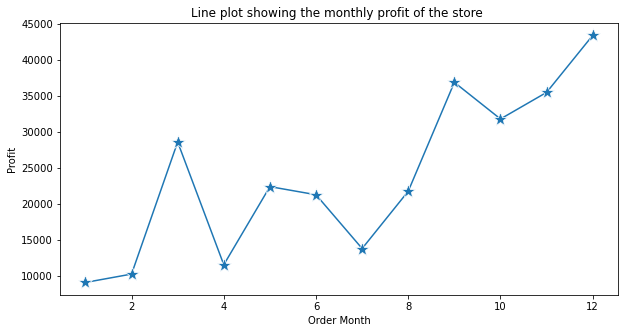

In [49]:
monthly_profit = sales_data.groupby('Order Month')['Profit'].sum().reset_index()


print('\n')

#now prepare for plotting:

plt.figure(figsize = (10,5))

sns.lineplot(data = monthly_profit, x = 'Order Month', y = 'Profit' , marker = "*", markersize = 15 )

plt.title("Line plot showing the monthly profit of the store ")

plt.show()

The store generated good profit in March, September and December in comparance to the other nearby months

The store started to make a good growing profit starting from the month of July till the month of December

A potential investor would prefer investing in the store company after june since the store started to make a gradually increasing profit
whereas in the beginning of the year the profit was flunctuating which makes it difficult for predictions and hence this would reflect a lot of risk for the investor 



=====================================================================================================




Analyse profits by category and sub-category

I. Use a pie plot to view profit by category

II. Now use a bar graph to show which products (sub-category) make the most profit

III. Based on the visual plot above, would you recommend the company to keep selling some of the products?

IV. Now look back, do the same products that contribute significantly to sales do the same when it comes to profit. Also visualize this, use a variable grouping bar plot!

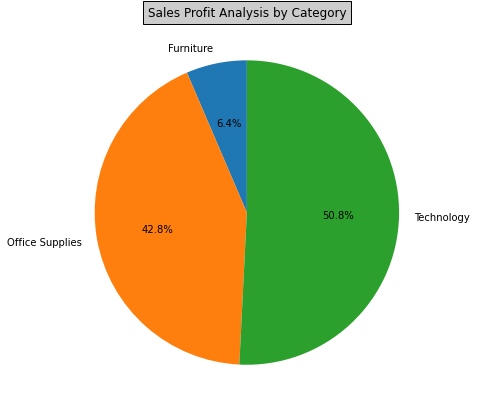

In [59]:
category_profit = sales_data.groupby('Category')['Profit'].sum().reset_index()

#Now preparing to plot
plt.figure(figsize = (10, 7))

labels = category_profit['Category']

plt.pie( data = category_profit, x = category_profit['Profit'], labels = labels,  autopct='%1.1f%%' , startangle = 90)

plt.title("Sales Profit Analysis by Category", bbox={'facecolor':'0.8', 'pad':5})

plt.show()

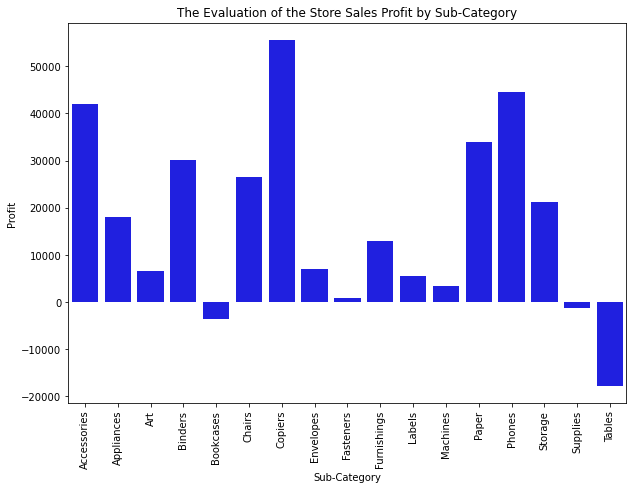

In [60]:
sub_category_profit = sales_data.groupby('Sub-Category')['Profit'].sum().reset_index()

#Now preparing for plotting

plt.figure(figsize= (10, 7))

sns.barplot(data = sub_category_profit, x = 'Sub-Category', y = 'Profit', color = 'blue')

labels = sub_category_profit['Sub-Category']

plt.title("The Evaluation of the Store Sales Profit by Sub-Category")

plt.xticks(ticks = np.arange(len(sub_category_profit['Sub-Category'])), labels = labels, rotation = 90)

plt.show()

From the bar chart, the store generates most of it's profit from selling Copiers, Accessories and Phones


It is also clear that the store is making losses from selling Bookcases, Suppliers and Tables.
One would recommend that the store should stop selling these items.

====================================================================================================================

Now look back, do the same products that contribute significantly to sales do the same when it comes to profit. Also visualize this, use a variable grouping bar plot!

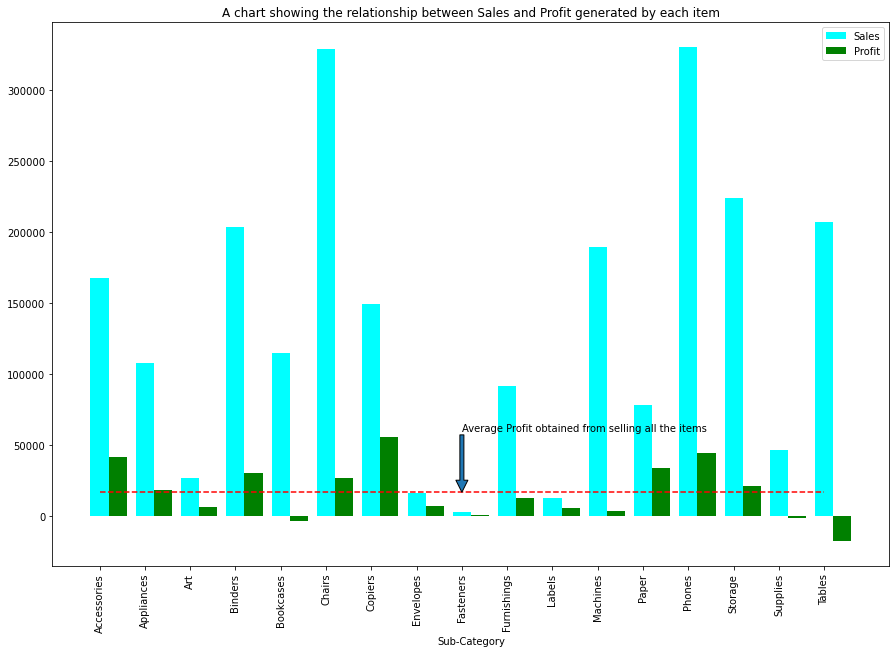

In [101]:
sub_category_sales_profit = sales_data.groupby('Sub-Category')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize= (15,10))

x = np.arange(len(sub_category_sales_profit['Sub-Category']))

bar_width = 0.40

plot1 =plt.bar(x, height = sub_category_sales_profit['Sales'], color = 'cyan' , width = bar_width)
plot2 =plt.bar(x+bar_width, height = sub_category_sales_profit['Profit'], color = 'green', width = bar_width )

plt.plot(sub_category_sales_profit['Sub-Category'], [sub_category_sales_profit['Profit'].mean() for i in range(17)], linestyle = "--", color = "red")

plt.xticks(x, labels = sub_category_sales_profit['Sub-Category'], rotation = 90 )

plt.xlabel("Sub-Category")
plt.title("A chart showing the relationship between Sales and Profit generated by each item")

#creating the average profit line: 

plt.legend([plot1, plot2],["Sales", "Profit"])

plt.annotate("Average Profit obtained from selling all the items", xy = ('Fasteners',sub_category_sales_profit['Profit'].mean()), xytext = ('Fasteners',60000), arrowprops={})

plt.show()



From the plot, we can see that chairs, copiers, phones and Binders contribute significantly to sales and also to profit.
The profit generated from these items also exceeds the average profit generated from selling all the store items.

On the other hand, tables also contribute significantly to sales but the store generates losses from selling them.

So this is an indication that not all products that contribute to sales significantly will also generate a lot of profit 
for the store
 